**Created by:** Revekka Gershovich
**When:** Dec 3, 2024
**Purpose:** Cleaning state partisan composition data

Note that Republican and Democratic parties are actually a number of ancestor and closely aligned parties commonly considered together by political scientist merged into one. That is why there is data for Republican party before 1854. Democrats (1 in pres_gov_party) also contain a Jackson (Democrats) party (1829-1854). Republicans (2 in pres_gov_party) also contain Whig party (1834-1856), Anti-Jacksonian party (1824-1837), and Opposition Coalition which includes Whig + Republican + Free Soil parties (1850-1856). 

In [1]:
import os
import os.path as path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
parent_dir = os.path.abspath("/Users/revekkagershovich/Dropbox (MIT)/StateLaws")
os.chdir(parent_dir)
assert os.path.exists(parent_dir), "parent_dir does not exist"
intermed_data_dir = "./2_data/2_intermediate/political_data"
assert os.path.exists(intermed_data_dir), "Data directory does not exist"
raw_data_dir = "./2_data/1_raw/political_data"
assert os.path.exists(raw_data_dir), "Data directory does not exist"

In [3]:
data_codes = data_codes = [f"{i:04d}" for i in range(1, 6)]

dataframes = {}

for data_code in data_codes:
    data_file = f"ICPSR_00016_2/DS{data_code}/00016-{data_code}-Data.csv"
    data_path = path.join(raw_data_dir, data_file)
    print(data_path)
    assert os.path.exists(data_path), "Data file does not exist"
    df = pd.read_csv(data_path)
    # Save the dataframe in the dictionary
    dataframes[f"df_{data_code}"] = df

    # Print confirmation
    print(f"DataFrame for {data_code} loaded successfully.")


./2_data/1_raw/political_data/ICPSR_00016_2/DS0001/00016-0001-Data.csv
DataFrame for 0001 loaded successfully.
./2_data/1_raw/political_data/ICPSR_00016_2/DS0002/00016-0002-Data.csv
DataFrame for 0002 loaded successfully.
./2_data/1_raw/political_data/ICPSR_00016_2/DS0003/00016-0003-Data.csv
DataFrame for 0003 loaded successfully.
./2_data/1_raw/political_data/ICPSR_00016_2/DS0004/00016-0004-Data.csv
DataFrame for 0004 loaded successfully.
./2_data/1_raw/political_data/ICPSR_00016_2/DS0005/00016-0005-Data.csv
DataFrame for 0005 loaded successfully.


In [4]:
df = dataframes["df_0001"]

In [5]:
df.columns

Index(['ICPR_STATE_CODE', 'X834_PARTY_OF_GOV', 'X834_UPP_HSE_DEM_SEATS',
       'X834_UPP_HSE_W_R_SEATS', 'X834_UPP_HSE_1_OTH_SEATS',
       'X834_UPP_HSE_2_OTH_SEATS', 'X834_UPP_HSE_TOTAL_SEATS',
       'X834_LOW_HSE_DEM_SEATS', 'X834_LOW_HSE_W_R_SEATS',
       'X834_LOW_HSE_1_OTH_SEATS',
       ...
       'X877_LOW_HSE_1_OTH_SEAT', 'X877_LOW_HSE_2_OTH_SEAT',
       'X878_UPP_HSE_DEM_SEAT', 'X878_UPP_HSE_W_R_SEAT',
       'X878_UPP_HSE_1_OTH_SEAT', 'X878_UPP_HSE_2_OTH_SEAT',
       'X878_LOW_HSE_DEM_SEAT', 'X878_LOW_HSE_W_R_SEAT',
       'X878_LOW_HSE_1_OTH_SEAT', 'X878_LOW_HSE_2_OTH_SEAT'],
      dtype='object', length=856)

In [6]:
df = df.replace([999, 9999], np.nan)

# Identify columns that end with "OTH_SEATS" or "OTH_SEAT"
columns_to_drop = [col for col in df.columns if col.endswith("OTH_SEATS") or col.endswith("OTH_SEAT")]

# Drop these columns from the DataFrame
df = df.drop(columns=columns_to_drop)

In [7]:
# Identify columns ending with '_SEAT'
seat_columns = [col for col in df.columns if col.endswith('_SEAT')]

# Correct the formatting by dividing these columns by 10
df[seat_columns] = df[seat_columns]/10

# The columns ending with SEAT actually represent percentages. I will use them to corroborate my own calculations of proportions.
renamed_columns = {col: col.replace('_SEAT', '_PCT') for col in seat_columns}
df = df.rename(columns=renamed_columns)

In [8]:
df.head()

,ICPR_STATE_CODE,X834_PARTY_OF_GOV,X834_UPP_HSE_DEM_SEATS,X834_UPP_HSE_W_R_SEATS,X834_UPP_HSE_TOTAL_SEATS,X834_LOW_HSE_DEM_SEATS,X834_LOW_HSE_W_R_SEATS,X834_LOW_HSE_TOTAL_SEATS,X835_PARTY_OF_GOV,X835_UPP_HSE_DEM_SEATS,...,X876_LOW_HSE_DEM_PCT,X876_LOW_HSE_W_R_PCT,X877_UPP_HSE_DEM_PCT,X877_UPP_HSE_W_R_PCT,X877_LOW_HSE_DEM_PCT,X877_LOW_HSE_W_R_PCT,X878_UPP_HSE_DEM_PCT,X878_UPP_HSE_W_R_PCT,X878_LOW_HSE_DEM_PCT,X878_LOW_HSE_W_R_PCT
0,1,29.0,4.0,17.0,21.0,50.0,156.0,206.0,100.0,16.0,...,42.7,57.3,42.9,57.1,44.7,55.3,33.3,66.7,41.0,58.2
1,2,100.0,15.0,10.0,25.0,99.0,71.0,170.0,100.0,NaN,...,20.5,79.5,12.9,87.1,34.4,64.2,0.0,64.5,14.6,43.0
2,3,29.0,1.0,33.0,40.0,80.0,285.0,368.0,29.0,18.0,...,22.9,74.2,12.5,87.5,28.7,71.2,10.0,85.0,16.7,77.1
3,4,100.0,12.0,0.0,12.0,163.0,63.0,226.0,100.0,11.0,...,46.0,54.0,33.3,66.7,40.9,59.1,16.7,83.3,35.8,60.2
4,5,NaN,10.0,0.0,10.0,28.0,39.0,72.0,NaN,2.0,...,13.9,86.1,22.2,77.8,25.0,75.0,30.6,69.4,23.6,76.4


In [9]:
columns_to_transform = [col for col in df.columns if col.startswith("X")]

# Melt the DataFrame to stack all relevant columns
melted_df = df.melt(id_vars=["ICPR_STATE_CODE"], 
                    value_vars=columns_to_transform, 
                    var_name="year_variable", 
                    value_name="value")

# Extract year and variable from the melted column
melted_df["year"] = melted_df["year_variable"].str.extract(r'X(\d{3,4})').astype(int) + 1000  # Convert year to 1800s format
melted_df["variable"] = melted_df["year_variable"].str.split("_", n=1).str[1]

# Drop the original column with combined year and variable
melted_df = melted_df.drop(columns=["year_variable"])

# Reshape the DataFrame: each unique variable becomes its column
reshaped_df = melted_df.pivot_table(index=["ICPR_STATE_CODE", "year"], 
                                    columns="variable", 
                                    values="value").reset_index()


In [10]:
non_pct_columns = [col for col in reshaped_df.columns if not col.endswith('_PCT')]

# Convert these columns to integers
reshaped_df[non_pct_columns] = reshaped_df[non_pct_columns].astype('Int64')  # 'Int64' handles NaNs gracefully for integers

I am mapping in the next cell the following parties to republicans and democrats: 
Democratic (100 - 1): 
Republican (200 - 2): Whigs (29), Opposition (Whigs + nascent Republicans + American) (34)

310 – AMERICAN – republican (2) 
311 - AMERICAN and REPUBLICAN – republican (2) 
35 - LAW AND ORDER WHIG – republican (2) 
768 - REPUBLICAN AMERICAN – republican (2) 
1063 - OPPOSITION – republican (2) 
843  - FUSION - drop
553 - UNION - drop
315 - WHIG AND AMERICAN – republican (2) 
636 - EQUAL RIGHTS 
605 - UNION REPUBLICAN – republican (2) 
330 - INDEPENDENT DEMOCRAT - democrat (1)     



In [11]:
# Define the mapping for PARTY_OF_GOV
party_mapping = {
    100: 1,   # Democratic
    330: 1,   # Independent Democrat
    200: 2,   # Republican
    310: 2,   # AMERICAN (Republican)
    311: 2,   # AMERICAN and REPUBLICAN
    35: 2,    # LAW AND ORDER WHIG
    768: 2,   # REPUBLICAN AMERICAN
    1063: 2,  # OPPOSITION (Republican)
    315: 2,   # WHIG AND AMERICAN
    605: 2,   # UNION REPUBLICAN
    843: np.nan,  # FUSION (Drop)
    553: np.nan   # UNION (Drop)
}

# Recode PARTY_OF_GOV using the mapping
reshaped_df['PARTY_OF_GOV'] = reshaped_df['PARTY_OF_GOV'].map(party_mapping)

reshaped_df['PARTY_OF_GOV'] = reshaped_df['PARTY_OF_GOV'].astype('Int64')

Here are ICPR state codes to standartize ICPR_STATE_CODE: https://usa.ipums.org/usa/volii/ICPSR.shtml

ALABAMA
State ICPSR: 41, FIPS: 01

ALASKA
State ICPSR: 81, FIPS: 02

ARIZONA
State ICPSR: 61, FIPS: 04

ARKANSAS
State ICPSR: 42, FIPS: 05

CALIFORNIA
State ICPSR: 71, FIPS: 06

COLORADO
State ICPSR: 62, FIPS: 08

CONNECTICUT
State ICPSR: 01, FIPS: 09

DELAWARE
State ICPSR: 11, FIPS: 10

DISTRICT OF COLUMBIA
State ICPSR: 98, FIPS: 11

FLORIDA
State ICPSR: 43, FIPS: 12

GEORGIA
State ICPSR: 44, FIPS: 13

HAWAII
State ICPSR: 82, FIPS: 15

IDAHO
State ICPSR: 63, FIPS: 16

ILLINOIS
State ICPSR: 21, FIPS: 17

INDIANA
State ICPSR: 22, FIPS: 18

IOWA
State ICPSR: 31, FIPS: 19

KANSAS
State ICPSR: 32, FIPS: 20

KENTUCKY
State ICPSR: 51, FIPS: 21

LOUISIANA
State ICPSR: 45, FIPS: 22

MAINE
State ICPSR: 02, FIPS: 23

MARYLAND
State ICPSR: 52, FIPS: 24

MASSACHUSETTS
State ICPSR: 03, FIPS: 25

MICHIGAN
State ICPSR: 23, FIPS: 26

MINNESOTA
State ICPSR: 33, FIPS: 27

MISSISSIPPI
State ICPSR: 46, FIPS: 28

MISSOURI
State ICPSR: 34, FIPS: 29

MONTANA
State ICPSR: 64, FIPS: 30

NEBRASKA
State ICPSR: 35, FIPS: 31

NEVADA
State ICPSR: 65, FIPS: 32

NEW HAMPSHIRE
State ICPSR: 04, FIPS: 33

NEW JERSEY
State ICPSR: 12, FIPS: 34

NEW MEXICO
State ICPSR: 66, FIPS: 35

NEW YORK
State ICPSR: 13, FIPS: 36

NORTH CAROLINA
State ICPSR: 47, FIPS: 37

NORTH DAKOTA
State ICPSR: 36, FIPS: 38

OHIO
State ICPSR: 24, FIPS: 39

OKLAHOMA
State ICPSR: 53, FIPS: 40

OREGON
State ICPSR: 72, FIPS: 41

PENNSYLVANIA
State ICPSR: 14, FIPS: 42

RHODE ISLAND
State ICPSR: 05, FIPS: 44

SOUTH CAROLINA
State ICPSR: 48, FIPS: 45

SOUTH DAKOTA
State ICPSR: 37, FIPS: 46

TENNESSEE
State ICPSR: 54, FIPS: 47

TEXAS
State ICPSR: 49, FIPS: 48

UTAH
State ICPSR: 67, FIPS: 49

VERMONT
State ICPSR: 06, FIPS: 50

VIRGINIA
State ICPSR: 40, FIPS: 51

WASHINGTON
State ICPSR: 73, FIPS: 53

WEST VIRGINIA
State ICPSR: 56, FIPS: 54

WISCONSIN
State ICPSR: 25, FIPS: 55

WYOMING
State ICPSR: 68, FIPS: 56

In [12]:
state_mapping = {
    41: "AL", 81: "AK", 61: "AZ", 42: "AR", 71: "CA",
    62: "CO", 1: "CT", 11: "DE", 98: "DC", 43: "FL",
    44: "GA", 82: "HI", 63: "ID", 21: "IL", 22: "IN",
    31: "IA", 32: "KS", 51: "KY", 45: "LA", 2: "ME",
    52: "MD", 3: "MA", 23: "MI", 33: "MN", 46: "MS",
    34: "MO", 64: "MT", 35: "NE", 65: "NV", 4: "NH",
    12: "NJ", 66: "NM", 13: "NY", 47: "NC", 36: "ND",
    24: "OH", 53: "OK", 72: "OR", 14: "PA", 5: "RI",
    48: "SC", 37: "SD", 54: "TN", 49: "TX", 67: "UT",
    6: "VT", 40: "VA", 73: "WA", 56: "WV", 25: "WI",
    68: "WY"
}

# Map the ICPR_STATE_CODE to state abbreviations
reshaped_df['state_abbrev'] = reshaped_df['ICPR_STATE_CODE'].map(state_mapping)

In [13]:
reshaped_df.sample(5)

variable,ICPR_STATE_CODE,year,LOW_HSE_DEM_PCT,LOW_HSE_DEM_SEATS,LOW_HSE_TOTAL_SEATS,LOW_HSE_W_R_PCT,LOW_HSE_W_R_SEATS,PARTY_OF_GOV,UPP_HSE_DEM_PCT,UPP_HSE_DEM_SEATS,UPP_HSE_TOTAL_SEATS,UPP_HSE_W_R_PCT,UPP_HSE_W_R_SEATS,state_abbrev
840,52,1842,57.3,47,82,42.7,35,1,38.1,8,21,61.9,13,MD
293,12,1840,22.6,12,53,77.4,41,<NA>,27.8,5,18,72.2,13,NJ
861,52,1875,69.0,58,84,31.0,26,1,73.1,19,26,26.9,7,MD
138,4,1838,53.7,130,242,46.3,112,1,66.7,8,12,33.3,4,NH
412,14,1869,40.0,40,100,60.0,60,2,43.8,14,32,56.3,18,PA


In [14]:
print(reshaped_df.isna().sum())

variable
ICPR_STATE_CODE          0
year                     0
LOW_HSE_DEM_PCT         59
LOW_HSE_DEM_SEATS       56
LOW_HSE_TOTAL_SEATS     58
LOW_HSE_W_R_PCT         58
LOW_HSE_W_R_SEATS       55
PARTY_OF_GOV           197
UPP_HSE_DEM_PCT         73
UPP_HSE_DEM_SEATS       72
UPP_HSE_TOTAL_SEATS     71
UPP_HSE_W_R_PCT         73
UPP_HSE_W_R_SEATS       72
state_abbrev             0
dtype: int64


In [15]:
# Count occurrences of each year and sort by year
year_counts = reshaped_df['year'].value_counts().sort_index()

print(year_counts)

year
1834    20
1835    16
1836    21
1837    17
1838    23
1839    18
1840    24
1841    19
1842    23
1843    19
1844    23
1845    20
1846    23
1847    21
1848    23
1849    22
1850    23
1851    21
1852    20
1853    19
1854    19
1855    19
1856    19
1857    21
1858    19
1859    22
1860    17
1861    16
1862    16
1863    17
1864    18
1865    17
1866    22
1867    19
1868    26
1869    22
1870    27
1871    18
1872    27
1873    18
1874    28
1875    17
1876    30
1877    16
1878    30
Name: count, dtype: Int64


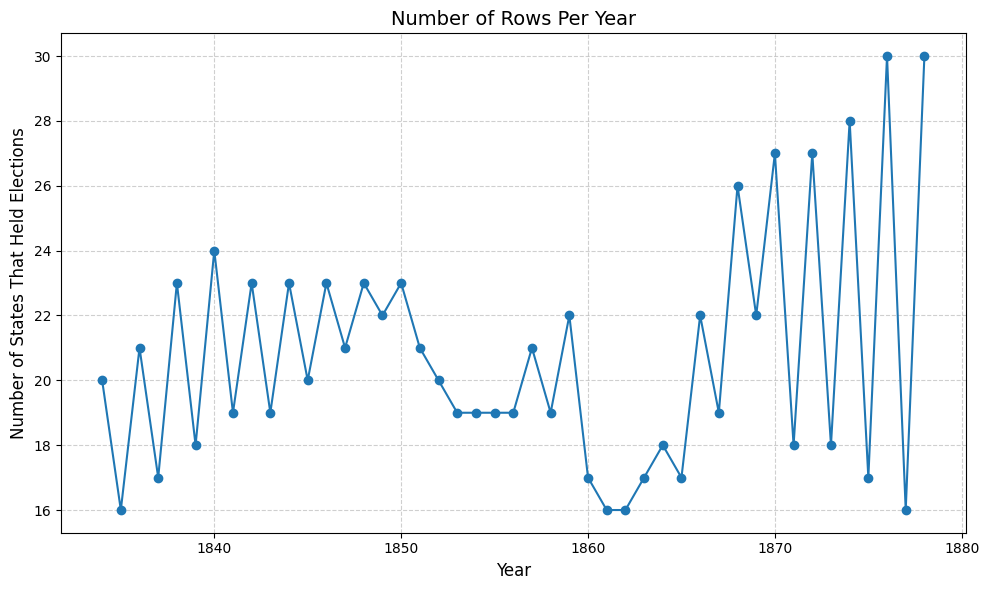

In [21]:
# Plot the counts
plt.figure(figsize=(10, 6))
plt.plot(year_counts.index, year_counts.values, marker='o')
plt.title('Number of Rows Per Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of States That Held Elections', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [17]:
odd_year_df = reshaped_df[reshaped_df['year'] % 2 != 0]

In [19]:
odd_year_df["state_abbrev"].unique()

array(['CT', 'ME', 'MA', 'NH', 'RI', 'VT', 'NJ', 'NY', 'PA', 'IN', 'MI',
       'OH', 'WI', 'IA', 'MN', 'VA', 'AL', 'AR', 'FL', 'GA', 'LA', 'MS',
       'NC', 'SC', 'TX', 'KY', 'MD', 'TN', 'WV', 'CA'], dtype=object)

In [20]:
set(reshaped_df["state_abbrev"]) - set(odd_year_df["state_abbrev"]) 
print(reshaped_df['state_abbrev'].nunique())
print(odd_year_df['state_abbrev'].nunique())

{'CO', 'DE', 'IL', 'KS', 'MO', 'NE', 'NV', 'OR'}

In [31]:
# Initialize results
results = []

# Group by state
for state, group in odd_year_df.groupby('state_abbrev'):
    group = group.sort_values('year')
    
    # Identify years where LOW_HSE_DEM_PCT crosses 50%
    low_crossing_years = group.loc[(group['LOW_HSE_DEM_PCT'] > 50).astype(int).diff().abs() > 0, 'year']
    
    # Identify years where UPP_HSE_DEM_PCT crosses 50%
    upp_crossing_years = group.loc[(group['UPP_HSE_DEM_PCT'] > 50).astype(int).diff().abs() > 0, 'year']
    
    # Identify years where PARTY_OF_GOV changes
    party_change_years = group.loc[group['PARTY_OF_GOV'].diff().abs().gt(0), 'year']
    
    # Combine all years and count unique ones
    unique_years = pd.concat([low_crossing_years, upp_crossing_years, party_change_years]).unique()
    # print(unique_years)
    num_occurrences = len(unique_years)
    
    # Append results for this state
    results.append({
        'state': state,
        'num_occurrences': num_occurrences
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

print(results_df)

print(f"Number of switches by all states is {results_df['num_occurrences'].sum()}")

   state  num_occurrences
0     AL                4
1     AR                0
2     CA               10
3     CT               11
4     FL                1
5     GA               11
6     IA                0
7     IN                5
8     KY                4
9     LA                3
10    MA                2
11    MD                9
12    ME                5
13    MI                3
14    MN                1
15    MS                6
16    NC                1
17    NH                7
18    NJ               13
19    NY               14
20    OH               12
21    PA               12
22    RI                4
23    SC                0
24    TN                9
25    TX                2
26    VA                9
27    VT                1
28    WI                5
29    WV                0
Number of switches by all states is 164


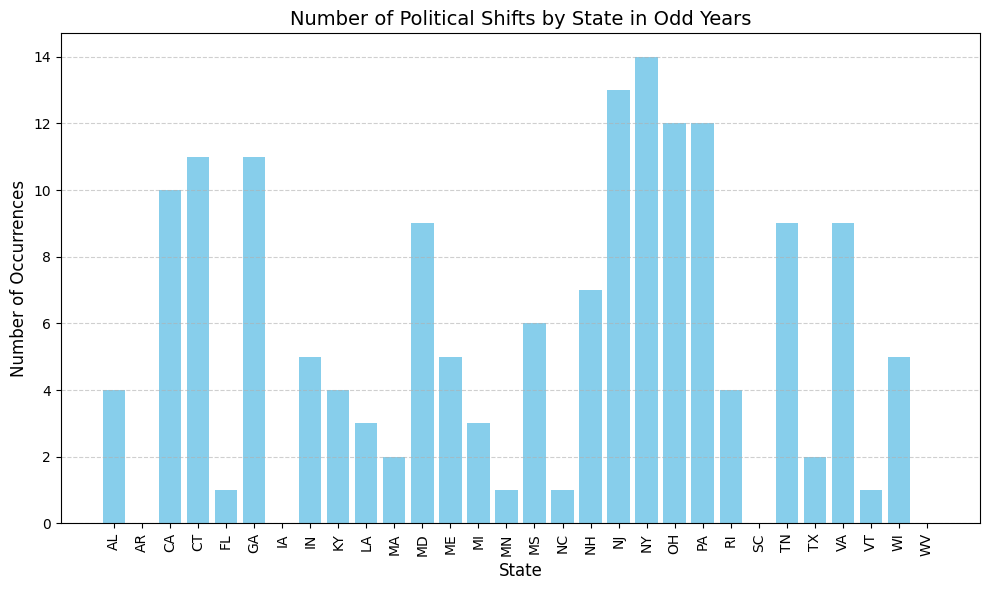

In [32]:
plt.figure(figsize=(10, 6))
plt.bar(results_df['state'], results_df['num_occurrences'], color='skyblue')
plt.title('Number of Political Shifts by State in Odd Years', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Years with Political Shifts', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()